In [4]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = ("D:/BIA Data Science and AI/Capstone project/MoviePrediction/movie_metadata.csv")
data = pd.read_csv(file_path)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
print ("Dataset Shape:",
       data.shape)

print("Data Info:")
print(data.info())

print("Summary Statistics:")
print(data.describe()) #understand dataset structure

Dataset Shape: (5043, 28)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = "D:/BIA Data Science and AI/Capstone project/MoviePrediction/movie_metadata.csv"  # Update the path accordingly
df = pd.read_csv(data_path)

# Handle missing values
# Replace missing values in categorical columns with an empty string
categorical_columns = ['director_name', 'actor_1_name', 'genres']  
for col in categorical_columns:
    df[col].fillna('', inplace=True)

# Replace missing values in numerical columns with 0
numerical_columns = ['duration', 'gross', 'imdb_score']  # Adjust based on your dataset
for col in numerical_columns:
    df[col].fillna(0, inplace=True)

# Label encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle empty values
    label_encoders[col] = le

# Feature selection
selected_features = ['imdb_score'] 
df = df[selected_features]

# Categorize IMDB Scores into 'Hit', 'Average', or 'Flop'
def classify_movie(score):
    if score <= 3:
        return 'Flop'
    elif 3 < score <= 6:
        return 'Average'
    else:
        return 'Hit'

df['Classify'] = df['imdb_score'].apply(classify_movie)

# Save preprocessed data to a CSV file
output_path = "D:/BIA Data Science and AI/Capstone project/MoviePrediction/preprocessed_movie_data.csv"
df.to_csv(output_path, index=False)

print(f"Preprocessed data saved to: {output_path}")

Preprocessed data saved to: D:/BIA Data Science and AI/Capstone project/MoviePrediction/preprocessed_movie_data.csv


C:\Users\gargi\AppData\Local\Temp\ipykernel_25536\1219152579.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
C:\Users\gargi\AppData\Local\Temp\ipykernel_25536\1219152579.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

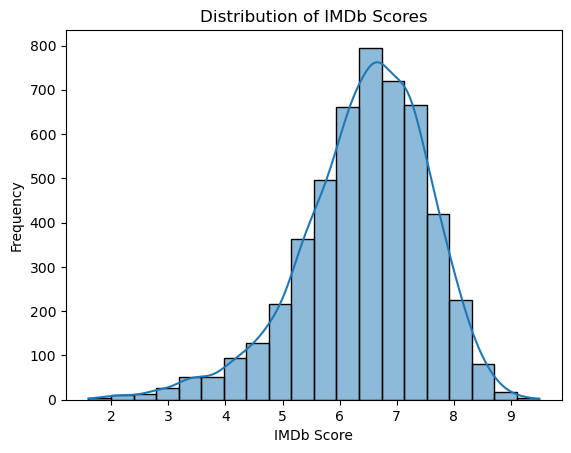

In [31]:
# Distribution of IMDb scores
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(data['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

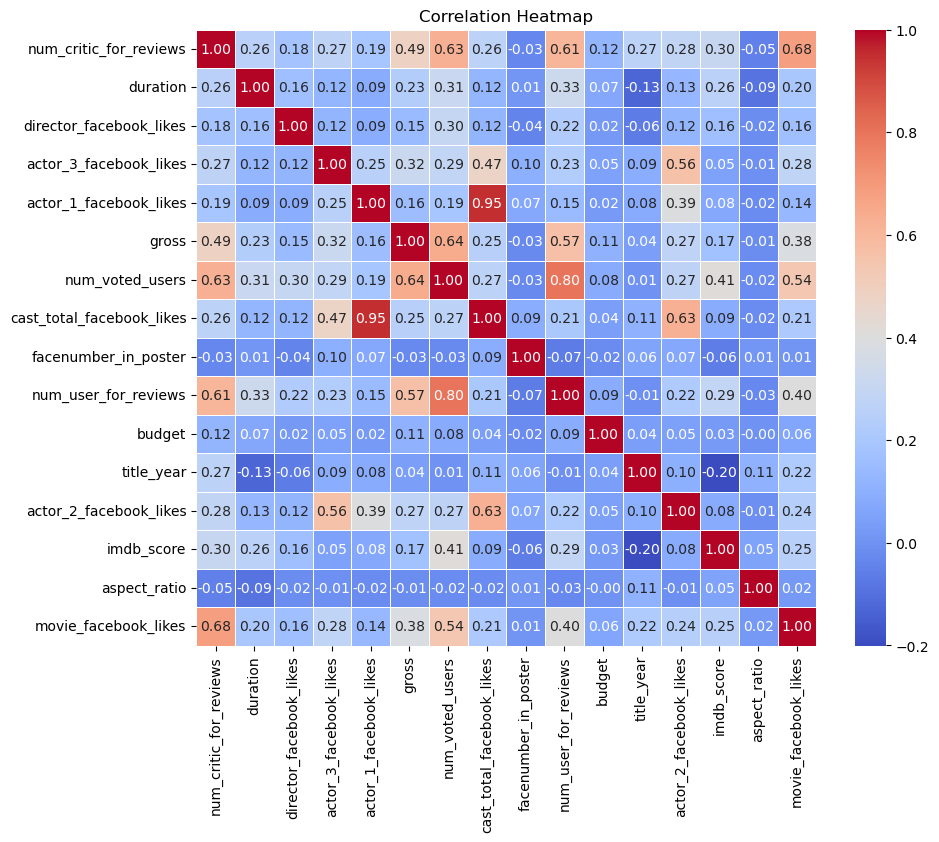

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Select Numeric Columns Only
numeric_data = data.select_dtypes(include=['int64', 'float64'])


if numeric_data.shape[1] > 1:  
    correlation_matrix = numeric_data.corr()

    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data to generate a correlation heatmap.")

C:\Users\gargi\AppData\Local\Temp\ipykernel_3528\2132266829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


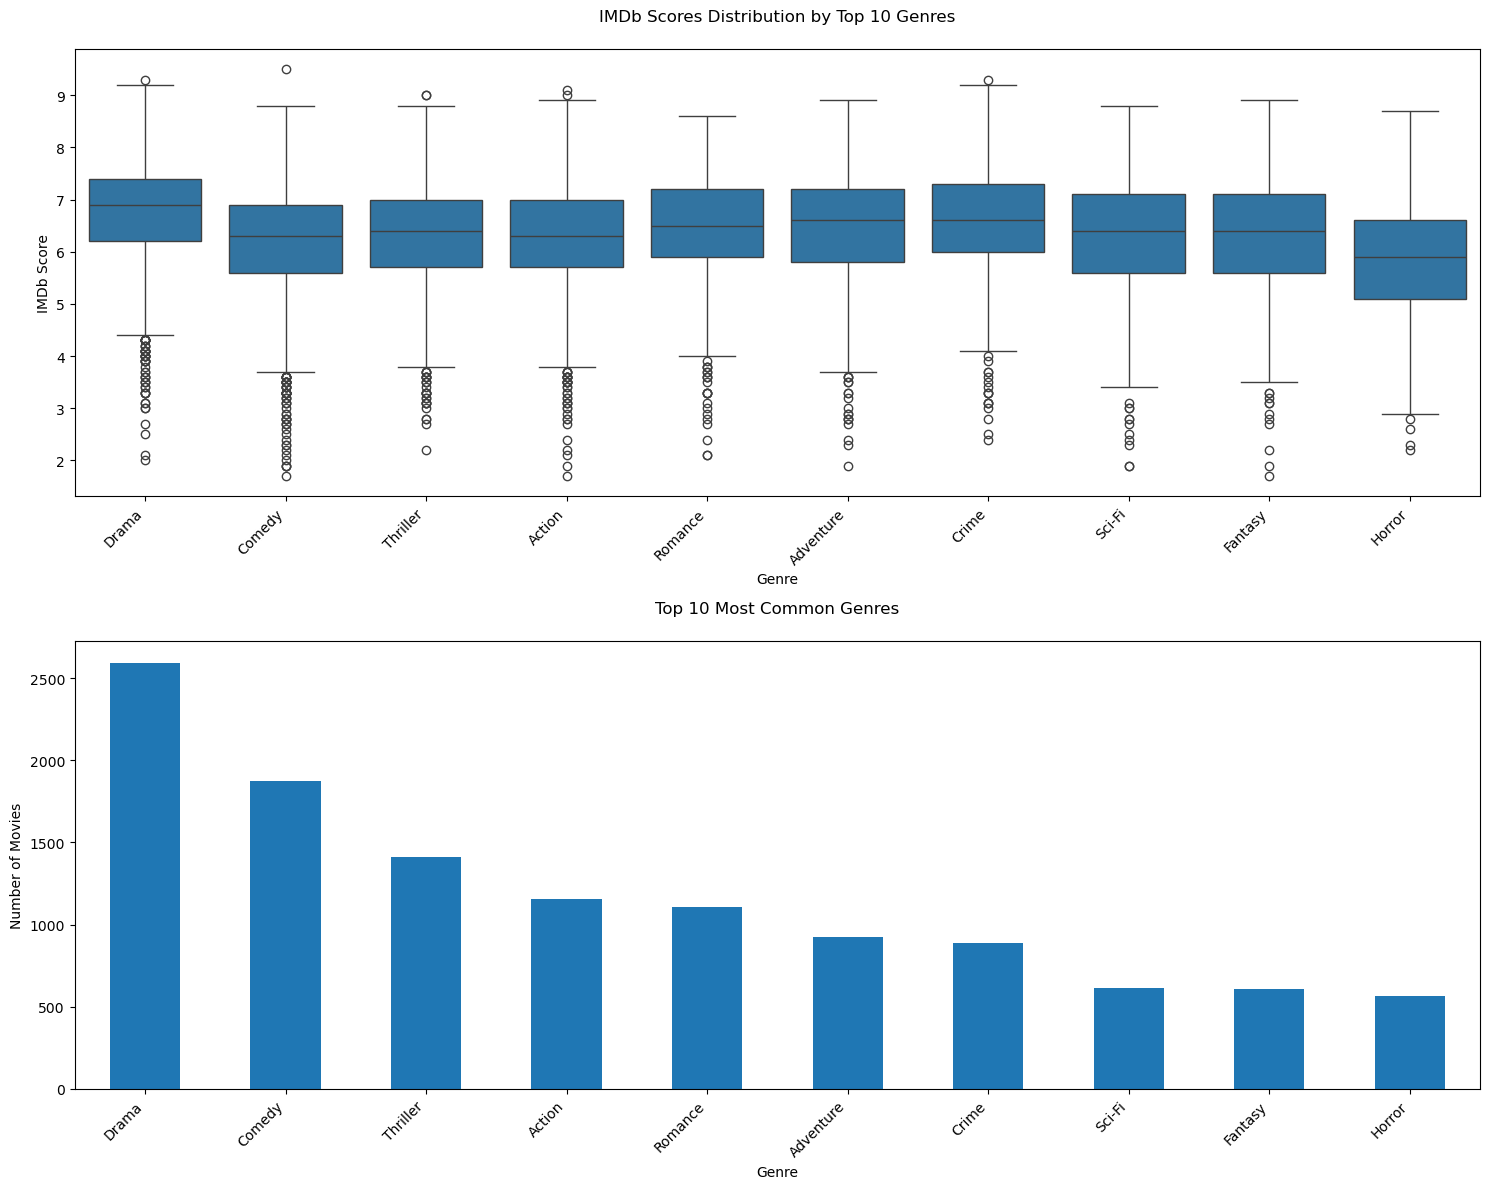


Average IMDb Score by Genre:
Drama: 6.76
Comedy: 6.20
Thriller: 6.31
Action: 6.24
Romance: 6.45
Adventure: 6.44
Crime: 6.56
Sci-Fi: 6.28
Fantasy: 6.31
Horror: 5.84


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# First, let's split the genres and get individual genre counts
def split_genres(genre_string):
    return str(genre_string).split('|')

# Create a list of all genres
all_genres = []
for genres in data['genres']:
    all_genres.extend(split_genres(genres))
genre_counts = pd.Series(all_genres).value_counts()

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top subplot: Box plot of IMDb scores by genre
plt.subplot(211)
genre_imdb = []
genre_names = []

for genre in genre_counts.index[:10]:  # Top 10 genres
    # Get movies containing this genre
    mask = data['genres'].str.contains(genre, na=False)
    scores = data[mask]['imdb_score']
    genre_imdb.extend(scores)
    genre_names.extend([genre] * len(scores))

genre_data = pd.DataFrame({
    'Genre': genre_names,
    'IMDb Score': genre_imdb
})

sns.boxplot(x='Genre', y='IMDb Score', data=genre_data, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('IMDb Scores Distribution by Top 10 Genres', pad=20)

# Bottom subplot: Genre frequency bar plot
plt.subplot(212)
genre_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Common Genres', pad=20)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print average IMDb score by genre
print("\nAverage IMDb Score by Genre:")
for genre in genre_counts.index[:10]:
    mask = data['genres'].str.contains(genre, na=False)
    avg_score = data[mask]['imdb_score'].mean()
    print(f"{genre}: {avg_score:.2f}")

C:\Users\gargi\AppData\Local\Temp\ipykernel_3528\280194941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,


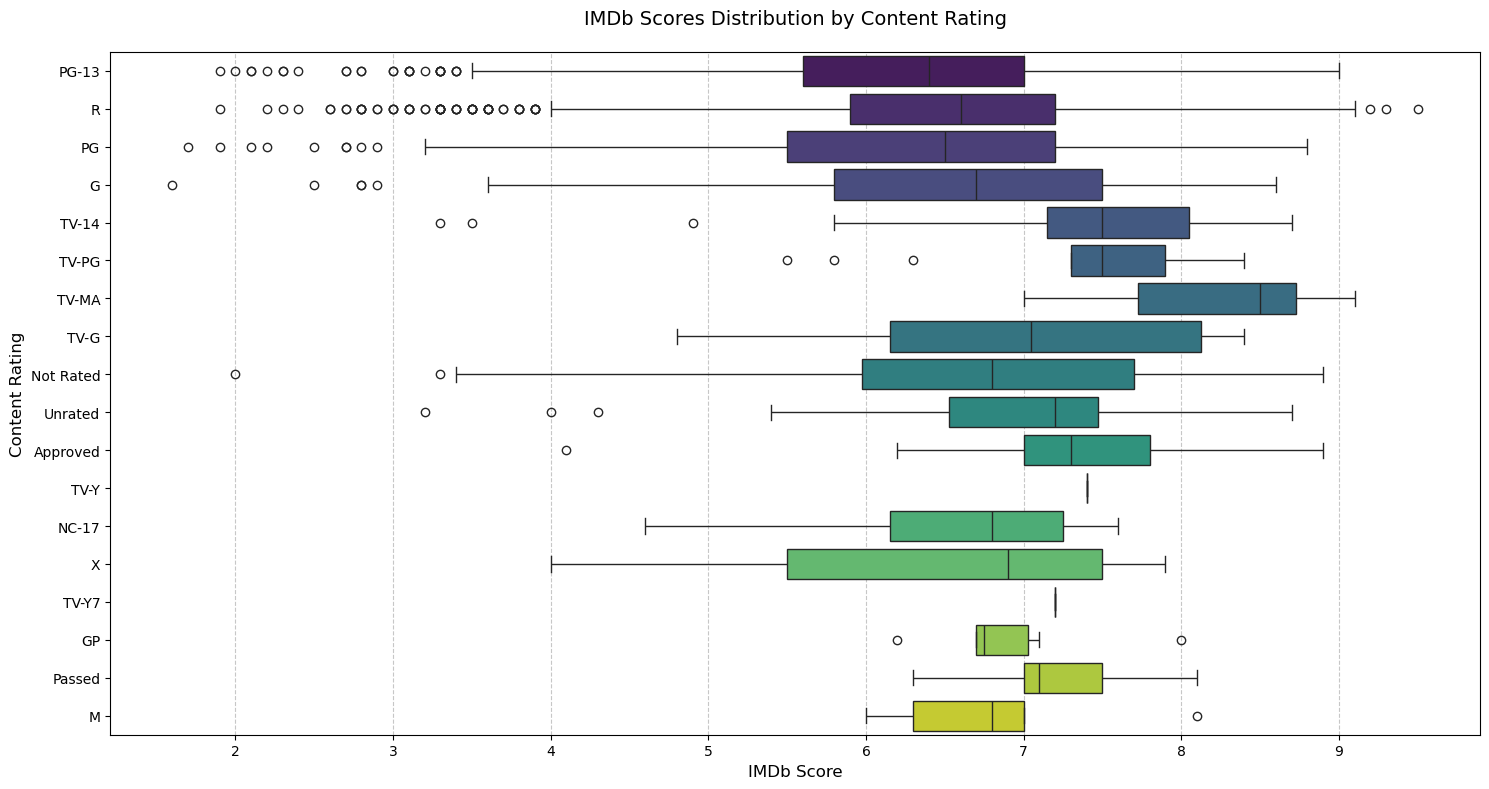


Summary Statistics by Content Rating:
                 count      mean       std  min    25%   50%    75%  max
content_rating                                                          
Approved          55.0  7.325455  0.714199  4.1  7.000  7.30  7.800  8.9
G                112.0  6.529464  1.401456  1.6  5.800  6.70  7.500  8.6
GP                 6.0  6.916667  0.604704  6.2  6.700  6.75  7.025  8.0
M                  5.0  6.840000  0.808084  6.0  6.300  6.80  7.000  8.1
NC-17              7.0  6.542857  1.022835  4.6  6.150  6.80  7.250  7.6
Not Rated        116.0  6.631034  1.342445  2.0  5.975  6.80  7.700  8.9
PG               701.0  6.294437  1.192314  1.7  5.500  6.50  7.200  8.8
PG-13           1461.0  6.257495  1.095936  1.9  5.600  6.40  7.000  9.0
Passed             9.0  7.166667  0.574456  6.3  7.000  7.10  7.500  8.1
R               2421.0  6.513094  1.067475  1.9  5.900  6.60  7.200  9.5
TV-14             30.0  7.250000  1.340033  3.3  7.150  7.50  8.050  8.7
TV-G        

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create boxplot with enhanced styling
sns.boxplot(data=data, 
           x='imdb_score',
           y='content_rating',
           palette='viridis',
           orient='h')  # Horizontal orientation for better label readability

# Customize the plot
plt.title('IMDb Scores Distribution by Content Rating', fontsize=14, pad=20)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, axis='x')

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nSummary Statistics by Content Rating:")
summary_stats = data.groupby('content_rating')['imdb_score'].describe()
print(summary_stats)

In [46]:
# Genre frequency and IMDb scores by genre
def split_genres(genre_string):
    return str(genre_string).split('|')

all_genres = []
for genres in data['genres']:
    all_genres.extend(split_genres(genres))

genre_counts = pd.Series(all_genres).value_counts()
print("Genre Frequency:\n", genre_counts)


Genre Frequency:
 Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
Name: count, dtype: int64


In [47]:
def categorize_imdb(score):
    if score >= 6:
        return 'Hit'
    elif score >= 3:
        return 'Average'
    else:
        return 'Flop'

# Categorize IMDb scores into classes
data['Category'] = data['imdb_score'].apply(categorize_imdb)

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load preprocessed data
data_path = "D:/BIA Data Science and AI/Capstone project/MoviePrediction/preprocessed_movie_data.csv"
df = pd.read_csv(data_path)

# Encode the target variable ('Classify') into numerical values
label_encoder = LabelEncoder()
df['Classify'] = label_encoder.fit_transform(df['Classify'])  # Encode 'Hit', 'Average', 'Flop'

# Define features and target
selected_features = ['imdb_score']  # After feature selection
X = df[selected_features]  # Features
y = df['Classify']  # Target

# Check if data is imbalanced and apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the features (especially important for models like Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Validate feature consistency
print(f"Selected Features: {list(X.columns)}")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")

# Hyperparameter tuning for Random Forest using RandomizedSearchCV with options to prevent overfitting
param_dist = {
    'n_estimators': [100, 200],         # Reasonable number of trees for better generalization
    'max_depth': [5, 10, 15],           # Limit depth of trees to prevent overfitting
    'min_samples_split': [5, 10],       # Require more samples to split a node
    'min_samples_leaf': [2, 5],         # More samples required in leaf nodes to reduce overfitting risk
    'max_features': ['sqrt', 'log2'],   # Limit features per tree to reduce variance
    'bootstrap': [True],                 # Use bootstrap sampling (keep it simple)
}

# Random Forest Model with Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best Random Forest Model after RandomizedSearchCV
best_rf = random_search.best_estimator_

# Make predictions and evaluate again
y_pred_train = best_rf.predict(X_train)  # Training predictions
y_pred_test = best_rf.predict(X_test)   # Test predictions

# Evaluate the model's performance on training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest: Training Accuracy = {train_accuracy:.4f}")
print(f"Random Forest: Test Accuracy = {test_accuracy:.4f}")  # Aim for balanced accuracy

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

# Evaluate Other Models using Cross-Validation with more iterations for better reliability
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': best_rf  # Use the best Random Forest from RandomizedSearchCV
}

# Compare models using cross-validation with increased folds for better evaluation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')  # Increased cv folds for reliability
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")  # Show mean and std deviation

Selected Features: ['imdb_score']
Training Features Shape: (8299, 1)
Testing Features Shape: (2075, 1)


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest: Training Accuracy = 1.0000
Random Forest: Test Accuracy = 1.0000
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       1.00      1.00      1.00       686
           2       1.00      1.00      1.00       692

    accuracy                           1.00      2075
   macro avg       1.00      1.00      1.00      2075
weighted avg       1.00      1.00      1.00      2075

Confusion Matrix (Test):
[[697   0   0]
 [  0 686   0]
 [  0   0 692]]
Logistic Regression: Mean Accuracy = 0.9939 ± 0.0028
SVM: Mean Accuracy = 0.9988 ± 0.0011
KNN: Mean Accuracy = 1.0000 ± 0.0000
Random Forest: Mean Accuracy = 1.0000 ± 0.0000


In [61]:
# Load preprocessed data
data_path = "D:/BIA Data Science and AI/Capstone project/MoviePrediction/preprocessed_movie_data.csv"
df = pd.read_csv(data_path)

# Use only one feature for simplicity and introduce noise
selected_features = ['imdb_score']  
X = df[selected_features]
y = df['Classify']

# Add random noise to features
noise = np.random.normal(0, 1, X.shape)
X += noise

# Sample a smaller subset of the dataset if needed
df_small = df.sample(frac=0.1, random_state=42)  
X = df_small[selected_features]
y = df_small['Classify']

# Split data into training and testing sets without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with adjusted parameters
model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00        31
        Flop       1.00      1.00      1.00         1
         Hit       1.00      1.00      1.00        69

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = "D:/BIA Data Science and AI/Capstone project/MoviePrediction/movie_metadata.csv"
data = pd.read_csv(file_path)

# Handle missing values (as shown in your previous code)
# Fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Define selected features
selected_features = ['imdb_score']

# Encode the target variable
label_encoder = LabelEncoder()
data['Category'] = data['imdb_score'].apply(lambda score: 'Hit' if score >= 6 else ('Average' if score >= 3 else 'Flop'))
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

# Define features and target variable
X = data[selected_features]  # Features with the selected 4 features
y = data['Category_encoded']  # Encoded target variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"\nModel: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Evaluate Random Forest
rf_y_pred = rf.predict(X_test)
evaluate_model("Random Forest", X_test, y_test, rf_y_pred)


Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [69]:
import joblib

# Save the model
joblib.dump(rf, 'movie_prediction_model.pkl')

['movie_prediction_model.pkl']

In [71]:
# Load the model
model = joblib.load('movie_prediction_model.pkl')

# Example input data
new_data = [[3]]

# Make prediction
prediction = model.predict(new_data)
print("Prediction:", label_encoder.inverse_transform(prediction))  # Decode the label

Prediction: ['Average']


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
